# Анализ данных на Python

*Алла Тамбовцева*

## Домашнее задание №3

В качестве решения необходимо загрузить ipynb-файл с добавленным кодом (и ответами на вопросы, где требуется текстовый ответ или интерпретация результатов) на Dropbox. Ответы на вопросы без приведённого и корректно работающего кода Python не засчитываются.

Всего за задание можно получить **20 баллов**.

### Описание данных

В [файле](https://github.com/allatambov/PyPerm24/blob/main/caffeine.csv) `caffeine.csv` содержатся характеристики различных напитков:

* `drink`: название напитка;
* `Volume (ml)`: объем напитка (в миллилитрах);
* `Calories`: количество калорий;
* `Caffeine (mg)`: содержание кофеина (в миллиграммах);
* `type`: тип напитка.

Загрузите данные из файла и сохраните в датафрейм `drinks`.

**NB.** Все задания выполняются последовательно – регрессионные модели в последних задачах необходимо строить на данных с учетом всех выполненных преобразований в задачах №1-4.

### Задача 1 (1 балл)

Оставьте в датафрейме `drinks` только те строки, которые соответствуют напиткам **ненулевой калорийности, содержащим кофеин**.

In [ ]:
import pandas as pd

drinks = pd.read_csv('caffeine.csv')
drinks = drinks[(drinks['Calories'] > 0) & (drinks['Caffeine (mg)'] > 0)]
drinks

,drink,Volume (ml),Calories,Caffeine (mg),type
2,Hell Energy Coffee,250.19181,150,100,Coffee
5,Espresso Monster,248.41740,170,160,Coffee
6,Dunkin Donuts Shot In The Dark,239.54535,80,134,Coffee
7,Illy Issimo Cafe,201.09980,45,155,Coffee
8,Starbucks Doubleshot Espresso,192.22775,140,120,Coffee
...,...,...,...,...,...
589,Poland Spring Sparkling Energy Water,340.09525,35,75,Water
591,VitaminWater Energy,591.47000,100,50,Water
594,Polar Frost Plus Energy,502.74950,10,67,Water
596,Sparkling Ice +Caffeine,473.17600,5,70,Water


### Задача 2 (1 балл)

Переименуйте столбцы `Caffeine (mg)` и `Volume (ml)` в `Caffeine` и `Volume`.

In [ ]:
drinks = drinks.rename(columns={'Volume (ml)': 'Volume', 'Caffeine (mg)': 'Caffeine'})
drinks

,drink,Volume,Calories,Caffeine,type
2,Hell Energy Coffee,250.19181,150,100,Coffee
5,Espresso Monster,248.41740,170,160,Coffee
6,Dunkin Donuts Shot In The Dark,239.54535,80,134,Coffee
7,Illy Issimo Cafe,201.09980,45,155,Coffee
8,Starbucks Doubleshot Espresso,192.22775,140,120,Coffee
...,...,...,...,...,...
589,Poland Spring Sparkling Energy Water,340.09525,35,75,Water
591,VitaminWater Energy,591.47000,100,50,Water
594,Polar Frost Plus Energy,502.74950,10,67,Water
596,Sparkling Ice +Caffeine,473.17600,5,70,Water


### Задача 3 (1 балл)

Добавьте в датафрейм `drinks` столбцы `Calories_norm` и `Caffeine_norm`, которые получаются делением калорийности и количества кофеина на объем напитка.

**NB.** В дальнейших задачах калорийность и содержание кофеина – это эти столбцы, не исходные `Calories` и `Caffeine`.

In [ ]:
drinks['Calories_norm'] = drinks['Calories'] / drinks['Volume']
drinks['Caffeine_norm'] = drinks['Caffeine'] / drinks['Volume']
drinks

,drink,Volume,Calories,Caffeine,type,Calories_norm,Caffeine_norm
2,Hell Energy Coffee,250.19181,150,100,Coffee,0.599540,0.399693
5,Espresso Monster,248.41740,170,160,Coffee,0.684332,0.644077
6,Dunkin Donuts Shot In The Dark,239.54535,80,134,Coffee,0.333966,0.559393
7,Illy Issimo Cafe,201.09980,45,155,Coffee,0.223769,0.770762
8,Starbucks Doubleshot Espresso,192.22775,140,120,Coffee,0.728303,0.624260
...,...,...,...,...,...,...,...
589,Poland Spring Sparkling Energy Water,340.09525,35,75,Water,0.102912,0.220526
591,VitaminWater Energy,591.47000,100,50,Water,0.169070,0.084535
594,Polar Frost Plus Energy,502.74950,10,67,Water,0.019891,0.133267
596,Sparkling Ice +Caffeine,473.17600,5,70,Water,0.010567,0.147936


### Задача 4 (1 балл)

Добавьте в датафрейм столбец `Soft`, где `Soft` соответствует газированным неэнергетическим напиткам (значение `Soft Drinks` в `type`), а `Other` – остальным напиткам.

**NB.** В дальнейших задачах тип напитка – это этот столбец.

In [ ]:
drinks[drinks["type"]=="Soft Drinks"]

,drink,Volume,Calories,Caffeine,type,Calories_norm,Caffeine_norm
429,Afri Cola,330.04026,139,83,Soft Drinks,0.421161,0.251484
430,Fritz Kola (EU),330.04026,135,83,Soft Drinks,0.409041,0.251484
432,Premium Cola (EU),330.04026,132,83,Soft Drinks,0.399951,0.251484
434,Bawls,473.17600,190,102,Soft Drinks,0.401542,0.215565
435,Mountain Dew Kickstart,473.17600,80,90,Soft Drinks,0.169070,0.190204
441,Ale 8 1,354.88200,120,37,Soft Drinks,0.338141,0.104260
443,Barqs Root Beer,354.88200,160,22,Soft Drinks,0.450854,0.061992
444,Big Red Soda,354.88200,150,34,Soft Drinks,0.422676,0.095806
445,Canada Dry Green Tea Ginger Ale,354.88200,140,9,Soft Drinks,0.394497,0.025361
446,Cheerwine,354.88200,150,47,Soft Drinks,0.422676,0.132438


In [ ]:
drinks['Soft'] = drinks['type'].apply(lambda x: 'Soft' if x == 'Soft Drinks' else 'Other')
drinks

,drink,Volume,Calories,Caffeine,type,Calories_norm,Caffeine_norm,Soft
2,Hell Energy Coffee,250.19181,150,100,Coffee,0.599540,0.399693,Other
5,Espresso Monster,248.41740,170,160,Coffee,0.684332,0.644077,Other
6,Dunkin Donuts Shot In The Dark,239.54535,80,134,Coffee,0.333966,0.559393,Other
7,Illy Issimo Cafe,201.09980,45,155,Coffee,0.223769,0.770762,Other
8,Starbucks Doubleshot Espresso,192.22775,140,120,Coffee,0.728303,0.624260,Other
...,...,...,...,...,...,...,...,...
589,Poland Spring Sparkling Energy Water,340.09525,35,75,Water,0.102912,0.220526,Other
591,VitaminWater Energy,591.47000,100,50,Water,0.169070,0.084535,Other
594,Polar Frost Plus Energy,502.74950,10,67,Water,0.019891,0.133267,Other
596,Sparkling Ice +Caffeine,473.17600,5,70,Water,0.010567,0.147936,Other


### Задача 5 (3 балла)

Используя библиотеку `seaborn`, постройте диаграмму рассеивания `Caffeine_norm` vs `Calories_norm`. Можно ли считать, что между этими показателями есть положительная связь?

Если на диаграмме присутствуют точки, которые, на ваш взгляд, могут искажать результаты дальнейшего регрессионного анализа (модель, в которой в числе прочего оценивается линейная связь между `Caffeine_norm` и `Calories_norm`), удалите их из датафрейма `drinks` и объясните свой выбор.

<Axes: xlabel='Caffeine_norm', ylabel='Calories_norm'>

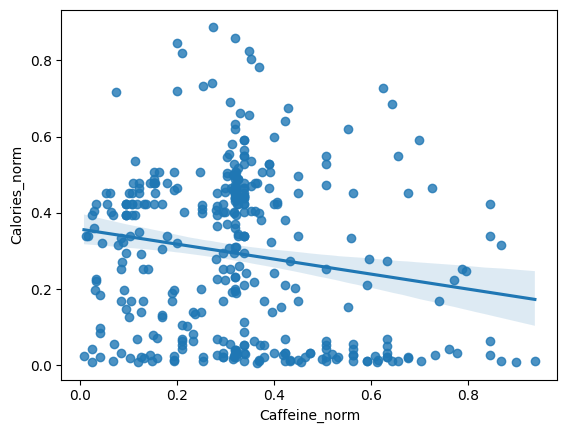

In [ ]:
import seaborn as sns
trash = drinks[(drinks['Caffeine_norm'] > 1) | (drinks['Calories_norm'] > 1)].index
drinks = drinks.drop(index=trash)
sns.regplot(data=drinks, x='Caffeine_norm', y='Calories_norm')


Между долей коффеина и каллориями в напитке точно присутствует обратная зависимость. Удаляем напитки со значением доли калорий>1 и с коффеином>1.

### Задача 6 (5 баллов)

Используя возможности библиотеки `statsmodels`, постройте модель линейной регрессии, которая позволяет предсказывать калорийность напитка в зависимости от содержания кофеина и его типа (газированный неэнергетический или нет). Выведите выдачу с результатами на экран и проинтерпретируйте ее. Ваша интерпретация должна включать:

* уравнение полученной модели (1 балл);
* пояснения к значениям коэффициентов при независимых переменных (2 балла);
* комментарий о значимости коэффициентов при независимых переменных (уровень значимости 5%) (1 балл);
* комментарий о предсказательной силе модели (1 балл).

In [ ]:
from statsmodels.formula.api import ols

model1 = ols("Calories_norm ~  Soft + Caffeine_norm", drinks).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          Calories_norm   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     8.791
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           0.000187
Time:                        14:54:56   Log-Likelihood:                 54.467
No. Observations:                 366   AIC:                            -102.9
Df Residuals:                     363   BIC:                            -91.23
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3238      0.026     12.636

1. уравнение = 0.3238 + 0.09 * Soft - 0.12 * Caffeine_norm

2. Если OTHER  и Caffeine_norm = 0, то среднее значение Calories_norm равно 0.3238
Когда напиток SOFT калории увеличиваются на 0.09
Когда Caffeine_norm увеличивается на 1, Calories_norm уменьшаются на 0.12
3. Оба коэффициента являются значимыми так как оба меньше 0.05
4. Показательная сила у модели не особо сильная, так как объясняет только 4% выборки

### Задача 7 (2 балла)

Используя библиотеку `seaborn`, постройте диаграммы рассеивания с добавленными на них регрессионными прямыми, которые позволят понять (на уровне визуального разведывательного анализа), есть ли разница в эффекте содержания кофеина на калорийность напитка у газированных неэнергетических напитков и всех остальных.

Прокомментируйте полученные результаты: есть ли явная разница в эффектах в двух группах напитков.

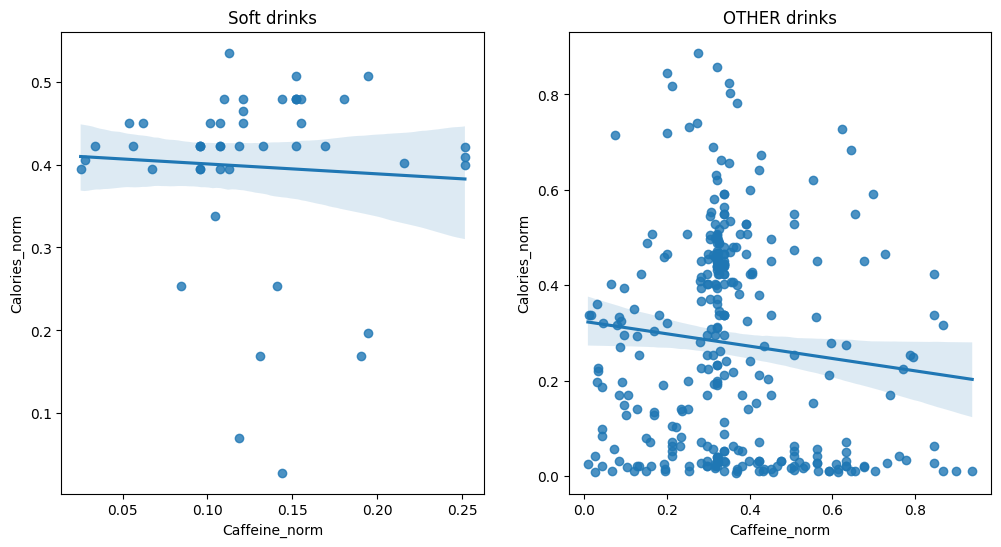

In [ ]:
import matplotlib.pyplot as plt
d1 = drinks[drinks["Soft"] == 'Soft']
d2 = drinks[drinks["Soft"] == 'Other']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.regplot(data=d1, x='Caffeine_norm', y='Calories_norm', ax=axes[0])
axes[0].set_title('Soft drinks')

sns.regplot(data=d2, x='Caffeine_norm', y='Calories_norm', ax=axes[1])
axes[1].set_title('OTHER drinks')

plt.show()

Угол наклона у Other drinks больше, значит количество кофеина сильнее влияет на калорийность, чем у газированных неэнергетических напитков

### Задача 8 (6 баллов)

Используя возможности библиотеки `statsmodels`, постройте обновленную модель линейной регрессии, которая позволяет предсказывать калорийность напитка в зависимости от содержания кофеина и его типа (газированный неэнергетический или нет), учитывая при этом, что содержание кофеина может по-разному оказывать эффект на калорийность в зависимости от типа напитка.

Выведите выдачу с результатами на экран и проинтерпретируйте ее. Ваша интерпретация должна включать:

* уравнение полученной модели (1 балл);
* пояснения к значениям коэффициентов при независимых переменных (2 балла);
* комментарий о значимости коэффициентов при независимых переменных (уровень значимости 5%) (1 балл);
* комментарий о предсказательной силе модели (1 балл);

(1 балл) Можно ли считать, хотя бы на 10%-ном уровне значимости, что эффект кофеина на калорийность, в среднем, отличается в зависимости от типа напитка?

In [ ]:
from statsmodels.formula.api import ols

model1 = ols("Calories_norm ~  Soft + Caffeine_norm:Soft", drinks).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          Calories_norm   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     5.844
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           0.000660
Time:                        15:59:48   Log-Likelihood:                 54.467
No. Observations:                 366   AIC:                            -100.9
Df Residuals:                     362   BIC:                            -85.32
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

1. уравнение = 0.3238 + 0.089 * Soft - 0.129 * Caffeine_norm(Other) - 0.119 * Caffeine_norm(Soft)

2. Если OTHER  и Caffeine_norm = 0, то среднее значение Calories_norm равно 0.3238
Когда напиток SOFT калории увеличиваются на 0.089
Когда Caffeine_norm и напиток газированный и не энергетический увеличивается на 1, Calories_norm уменьшаются на 0.119
Когда Caffeine_norm и напиток другой увеличивается на 1, Calories_norm уменьшаются на 0.129
3.  Caffeine_norm при других напитках являются значимым так как p value меньше 0.05, Soft и Caffeine_norm при газ и неэнергетических напитках не значимы
4. Показательная сила у модели не особо сильная, так как объясняет только 4% выборки
5. Да эффект кофеина отличается на 10% в зависимости от типа напитка